# Parallelize Python code with Dask Delayed

## General Python code

In [1]:
from time import sleep

In [2]:
def inc(x):
    sleep(1)
    return x + 1

def dec(x):
    sleep(1)
    return x - 1

def add(x, y):
    sleep(1)
    return x + y

In [3]:
%%time

a = inc(1)
b = dec(1)
c = add(a, b)

CPU times: user 730 µs, sys: 1.18 ms, total: 1.91 ms
Wall time: 3.01 s


In [4]:
%%time

l = []

for i in range(10):
    a = inc(i)
    b = dec(i)
    c = add(a, b)
    l.append(c)

CPU times: user 1.88 ms, sys: 1.82 ms, total: 3.7 ms
Wall time: 30.1 s


## Dask Delayed

In [5]:
from dask.distributed import Client, progress
client = Client(n_workers=1)
client

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Status: running,Using processes: True
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 12,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:57566,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:57570,Total threads: 12
Dashboard: http://127.0.0.1:57571/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:57568,


Open the dashboards!

In [6]:
from dask import delayed, compute

In [7]:
%%time

l = []

for i in range(10):
    a = delayed(inc)(i)
    b = delayed(dec)(i)
    c = delayed(add)(a, b)
    l.append(c)

CPU times: user 3.32 ms, sys: 1.9 ms, total: 5.22 ms
Wall time: 3.8 ms


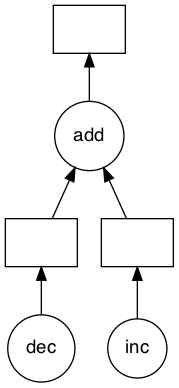

In [8]:
c.visualize()

In [9]:
%%time

l = compute(*l)

CPU times: user 234 ms, sys: 157 ms, total: 391 ms
Wall time: 3.31 s


### Alternatively...

In [10]:
@delayed
def inc(x):
    sleep(1)
    return x + 1

@delayed
def dec(x):
    sleep(1)
    return x - 1

@delayed
def add(x, y):
    sleep(1)
    return x + y

Or:

In [ ]:
# inc = delayed(inc)
# dec = delayed(dec)
# add = delayed(add)

In [11]:
%%time

l = []

for i in range(10):
    a = inc(i)
    b = dec(i)
    c = add(a, b)
    l.append(c)
    
l = compute(*l)

CPU times: user 92 ms, sys: 16.1 ms, total: 108 ms
Wall time: 3.04 s


## Another example: pandas

In [ ]:
# !wget https://coiled-datasets.s3.us-east-2.amazonaws.com/seattle-library-checkouts/checkouts-subset.csv

In [12]:
import pandas as pd

In [13]:
%%time

ddf = delayed(pd.read_csv)("checkouts-subset.csv") # with delayed

CPU times: user 472 µs, sys: 232 µs, total: 704 µs
Wall time: 552 µs


In [14]:
%%time

result = ddf.groupby("UsageClass").Checkouts.sum()

CPU times: user 317 µs, sys: 62 µs, total: 379 µs
Wall time: 358 µs


In [15]:
result

Delayed('sum-74b130a7-b58b-4da5-9a4a-4b16a731a16f')

In [16]:
result.compute()

UsageClass
Digital      8772938
Physical    52609482
Name: Checkouts, dtype: int64

In [17]:
client.close()